# Photometric precision calculator

In [1]:
import mphot

## Load the camera QE and filter files

In [2]:
# example files used to generate spectral response (SR)
efficiencyFile1 = './resources/systems/HPP_IMX461.csv' # in microns, fractional efficiency
filterFile1 = './resources/filters/r.csv'

name1, SR1 = mphot.generateSR(efficiencyFile1, filterFile1)

In [3]:
# example files used to generate SR
efficiencyFile2 = './resources/systems/pirtSPC_-60.csv'
filterFile2 = './resources/filters/J.csv'

name2, SR2 = mphot.generateSR(efficiencyFile2, filterFile2)

## Set sky and instrument properties

In [4]:
props_sky = {
    "pwv" : 30, # PWV [mm]
    "airmass" : 3, # Airmass
    "seeing" : 4 # Seeing/FWHM ["]
}

props_telescope1 = {
    "name" : name1, # name to get SR/precision grid from file
    "plate_scale" : 0.35, # pixel plate scale ["]
    "N_dc" : 0.2, # dark current [e/pix/s]
    "N_rn" : 6.328, # read noise [e_rms/pix]
    "well_depth" : 64000, # well depth [e/pix]
    "bias_level" : 0, # bias level [e/pix] - not really needed if well depth ignores bias level
    "well_fill" : 0.7, # fractional value to fill central target pixel, assuming gaussian (width function of seeing^)
    "read_time" : 10.5, # read time between images [s]
    "r0" : 0.5, # radius of telescope's primary mirror [m]
    "r1" : 0.14, # radius of telescope's secondary mirror [m]
    "ap_rad" : 3 # aperture radius [FWHM] -- 3 default == 7 sigma of Gaussian ~ aperture 6 on Cambridge pipeline/Portal
}


props_telescope2 = {
    "name" : name2,
    "plate_scale" : 0.301,
    "N_dc" : 150,
    "N_rn" : 90,
    "well_depth" : 55000,
    "bias_level" : 0,
    "well_fill" : 0.7,
    "read_time" : 0.1,
    "r0" : 0.5,
    "r1" : 0.14,
    "ap_rad" : 3
}



## Run models!

In [7]:
Teff = 4800 # [K]
distance = 19.78 # [pc]

Teff = 2600 # [K]
distance = 12 # [pc]

r1 = mphot.get_precision(props_telescope1, props_sky, Teff, distance, override=False)
r2 = mphot.get_precision(props_telescope2, props_sky, Teff, distance, override=False)

In [8]:
mphot.display_results(props_sky, r1, r2)

single       binned      
                   1     2      1     2
All             73.2  4.71   34.1  2.11
Star            6.42 0.590   3.00 0.264
Scintillation   1.72  1.72  0.804 0.772
Sky             70.0  1.75   32.7 0.784
Dark current    12.3  3.30   5.73  1.48
Read noise      15.9  2.22   7.40 0.991

,1,2
name,HPP_IMX461_r,pirtSPC_-60_J
Teff [K],2.60e+3,2.60e+3
distance [pc],12.0,12.0
N_star [e/s],202,2.39e+4
star_flux [e/m2/s],319,3.78e+4
scn [e_rms],41.8,4.95e+3
npix,3.69e+3,4.99e+3
ap_radius [pix],34.3,39.9
N_sky [e/pix/s],6.50,42.2
sky_radiance [e/m2/arcsec2/s],73.3,644


,1,2
star [mag],17.6,11.3
sky [mag/arcsec2],19.1,15.6
vega_flux [e/s],2.22e+9,8.26e+8


In [ ]:
mphot.display_results(props_sky, r1, r2)

/Users/peter/Github/mphot/mphot.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tmp', 1)
/Users/peter/Github/mphot/mphot.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tmp', 1)


single        binned        
                    1     2       1       2
All              5.01  10.6    1.26   0.786
Star            0.255 0.363  0.0642  0.0270
Scintillation    5.01  10.5    1.26   0.783
Sky            0.0289 0.108 7.27e-3 8.06e-3
Dark current  8.32e-4 0.204 2.09e-4  0.0152
Read noise     0.0146 0.837 3.66e-3  0.0622

,1,2
name,HPP_IMX461_r,pirtSPC_-60_J_final_theory
Teff [K],4.80e+3,4.80e+3
distance [pc],19.8,19.8
N_star [e/s],4.27e+5,2.36e+6
star_flux [e/m2/s],2.59e+6,3.26e+6
scn [e_rms],7.67e+4,8.00e+4
npix,1.13e+4,4.99e+3
ap_radius [pix],60.0,39.9
N_sky [e/pix/s],0.484,42.2
sky_radiance [e/m2/arcsec2/s],73.3,644


,1,2
star [mag],7.68,6.36
sky [mag/arcsec2],19.1,15.6
vega_flux [e/s],5.06e+8,8.26e+8


### Extract exposure time nicely

In [ ]:
import numpy as np
ccd = mphot.get_precision(props_telescope1, props_sky, Teff, distance, override=False, mapping=True)
spirit = mphot.get_precision(props_telescope2, props_sky, Teff, distance, override=False, mapping=True)

spirit

In [ ]:
ccd['binned_precision']['All']*1000/np.sqrt(100)

In [ ]:

spirit['binned_precision']['All']*1000#/np.sqrt(30)

In [ ]:
spirit['components']['t [s]']

# Sparse telescope array

In [193]:
props_sky = {
    "pwv" : 2.5, # PWV [mm]
    "airmass" : 1.5, # Airmass
    "seeing" : 1.5 # Seeing/FWHM ["]
}

Teff = 	6360 # [K]
distance = 432 # [pc]
plate_scale = 1 # ["/pixel]
read_time = 0.01 # [s]
initial_diameter = 0.5 # [m]


## spirit
props_telescope1 = {
    "name" : name2,
    "plate_scale" : plate_scale,
    "N_dc" : 200,
    "N_rn" : 89.95,
    "well_depth" : 55000,
    "bias_level" : 0,
    "well_fill" : 0.7,
    "read_time" : read_time,
    "r0" : initial_diameter/2,
    "r1" : 0,
    "ap_rad" : 3
}

## hawaii
props_telescope2 = {
    "name" : name2,
    "plate_scale" : 0.35,
    "N_dc" : 0.05,
    "N_rn" : 30,
    "well_depth" : 80000,
    "bias_level" : 0,
    "well_fill" : 0.7,
    "read_time" : read_time,
    "r0" : 0.075,
    "r1" : 0,
    "ap_rad" : 3
}


In [194]:
t1 = mphot.get_precision(props_telescope1, props_sky, Teff, distance, override=False, mapping=True, binning=30)#['binned_precision']['All']*1e6

for k in t1['binned_precision']:
    print(k, t1['binned_precision'][k]*1e6)

print(t1['components']['t [s]'])

All 385.4301178589073
Star 118.12876638490664
Scintillation 250.38099609560592
Sky 72.94455274291685
Dark current 66.66544096720656
Read noise 249.29127201943342
2.8930750822974702


In [195]:
Ns = np.arange(1, 101, 1)
r0s = np.arange(0.15/2, 5, 0.1)

sigma_small_many = []
sigma_big_single = []
sigma_big_single_space = []

sigma_small_single = mphot.get_precision(props_telescope1, props_sky, Teff, distance, override=False, mapping=True)['binned_precision']['All']*1e6

for N in Ns:
    sigma_small_many.append(sigma_small_single/np.sqrt(N))


for r0 in r0s:
    props_telescope2['r0'] = r0

    tele = mphot.get_precision(props_telescope2, props_sky, Teff, distance, override=False, mapping=True)
    sigma_big_single.append(tele['binned_precision']['All']*1e6)

    # space = tele
    ks = ['Star', 'Dark current', 'Read noise']
    v = 0
    for k in ks:
        v += tele['binned_precision'][k]**2
    sigma_big_single_space.append(np.sqrt(v)*1e6)
    

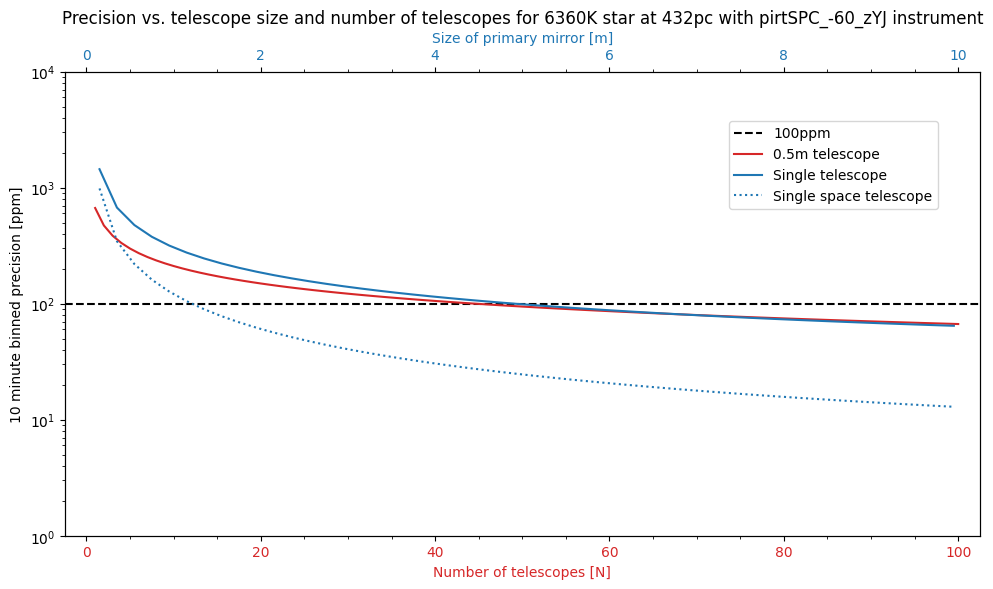

In [196]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Precision vs. telescope size and number of telescopes for {Teff}K star at {distance}pc with {name2} instrument')
ax1.set_ylabel('10 minute binned precision [ppm]')

color = 'tab:red'
ax1.axhline(100, color='black', linestyle='--', label='100ppm')
ax1.plot(Ns, sigma_small_many, color=color, label=f"{props_telescope1['r0']*2}m telescope")
ax1.set_xlabel('Number of telescopes [N]', color=color)
ax1.set_xlim(0-2.5, 100+2.5)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylim(1, 10000)
ax1.set_yscale('log')
ax1.minorticks_on()

ax2 = ax1.twiny()
color = 'tab:blue'
ax2.plot(r0s*2, sigma_big_single, color=color, label="Single telescope")
ax2.plot(r0s*2, sigma_big_single_space, color='tab:blue', linestyle=':', label="Single space telescope")
ax2.set_xlabel('Size of primary mirror [m]', color=color)
ax2.set_xlim(0-.25,10+.25)
ax2.tick_params(axis='x', labelcolor=color)
ax2.minorticks_on()

# legend
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.8))

fig.tight_layout()


pirtSPC_-60_zYJ


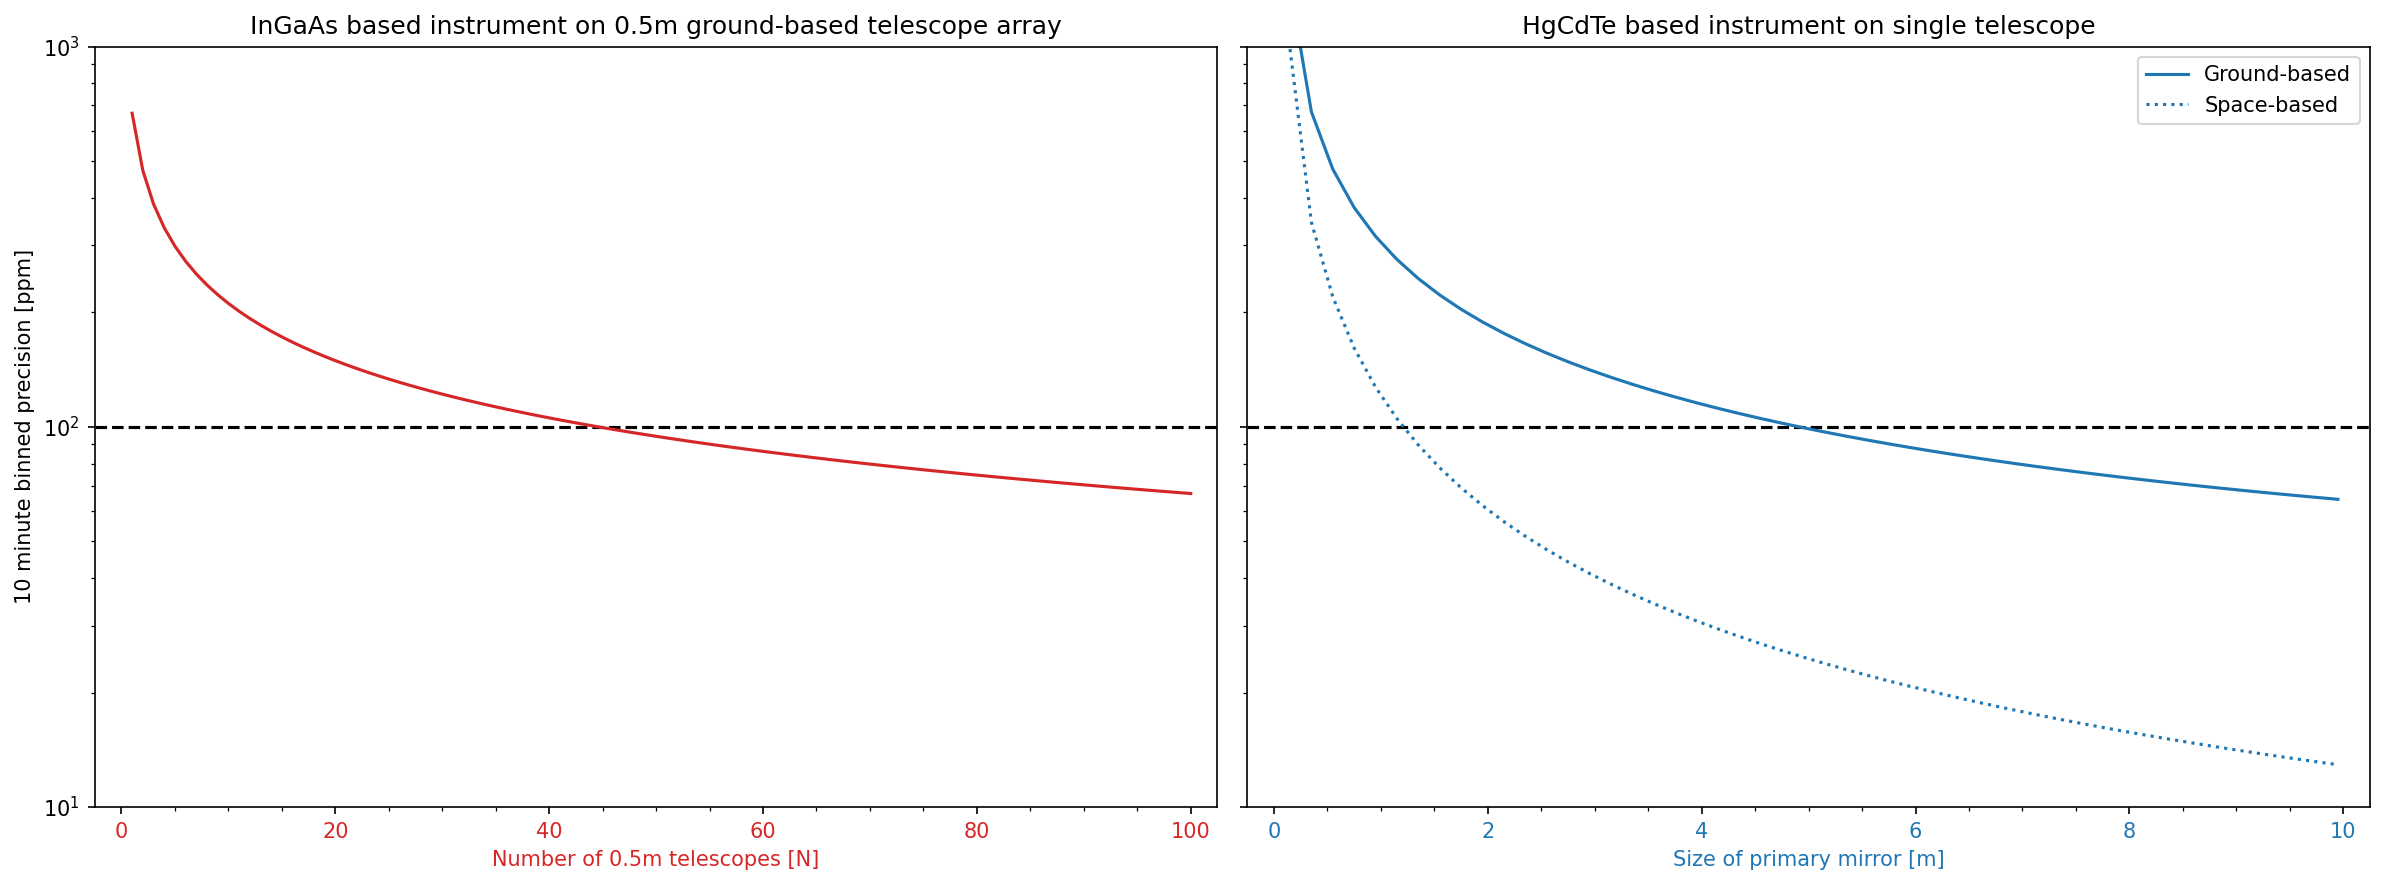

In [197]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 6), sharey=True, dpi=150)
# ax1.set_title(f'Precision vs. telescope size and number of telescopes for {Teff}K star at {distance}pc with {name2} instrument')
ax1.set_ylabel('10 minute binned precision [ppm]')

color = 'tab:red'
ax1.axhline(100, color='black', linestyle='--')
ax2.axhline(100, color='black', linestyle='--')

ax1.set_title(f"InGaAs based instrument on {props_telescope1['r0']*2}m ground-based telescope array")
ax1.plot(Ns, sigma_small_many, color=color, label=f"{props_telescope1['r0']*2}m telescope")
ax1.set_xlabel(f"Number of {props_telescope1['r0']*2}m telescopes [N]", color=color)
ax1.set_xlim(0-2.5, 100+2.5)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylim(10, 1000)
ax1.set_yscale('log')
ax1.minorticks_on()

# ax2 = ax1.twiny()
color = 'tab:blue'
ax2.set_title('HgCdTe based instrument on single telescope')
ax2.plot(r0s*2, sigma_big_single, color=color, label="Ground-based")
ax2.plot(r0s*2, sigma_big_single_space, color='tab:blue', linestyle=':', label="Space-based")
ax2.set_xlabel('Size of primary mirror [m]', color=color)
ax2.set_xlim(0-.25,10+.25)
ax2.tick_params(axis='x', labelcolor=color)
ax2.minorticks_on()
ax2.legend()

# legend
# fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.8))

# grid
# ax1.grid(True, alpha=0.2)
# ax2.grid(True, alpha=0.2)

fig.tight_layout()
print(name2)

In [198]:
import pandas as pd
df_small = pd.DataFrame({'N': Ns}, index=sigma_small_many)
df_big = pd.DataFrame({'diameter': 2*r0s}, index=sigma_big_single)

/Users/peter/Github/mphot/mphot.py:39: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop('tmp', 1)


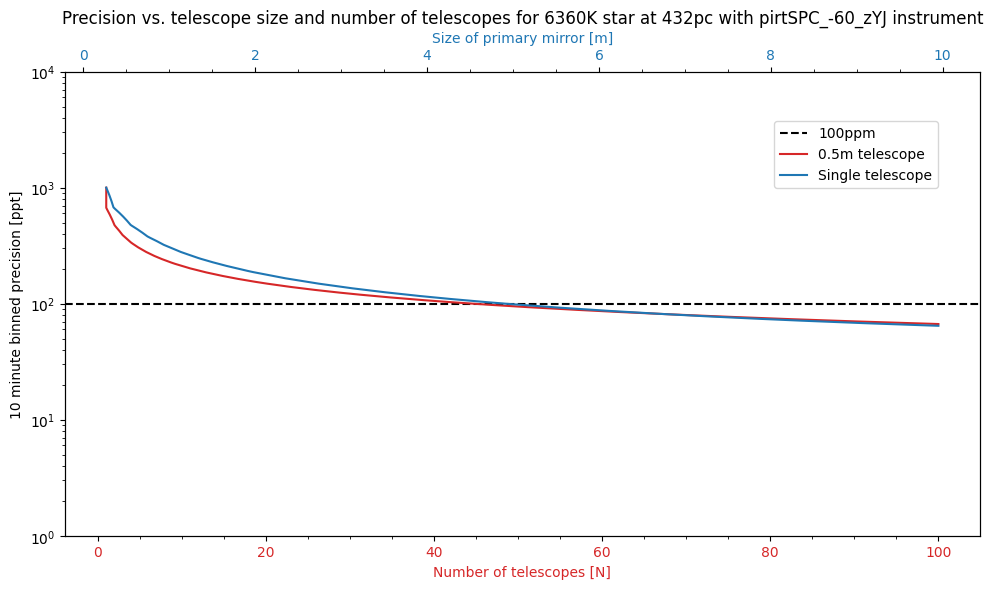

In [199]:
sigmas = np.logspace(0, 3, 1000000)

df = mphot.interpolate_dfs(sigmas, df_small, df_big)#.plot(logy=True)
df#.plot()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Precision vs. telescope size and number of telescopes for {Teff}K star at {distance}pc with {name2} instrument')
ax1.set_ylabel('10 minute binned precision [ppt]')

color = 'tab:red'
ax1.axhline(100, color='black', linestyle='--', label='100ppm')
ax1.plot(df['N'], df.index, color=color, label=f"{props_telescope1['r0']*2}m telescope")
ax1.set_xlabel('Number of telescopes [N]', color=color)
ax1.tick_params(axis='x', labelcolor=color)
ax1.set_ylim(1, 10000)
ax1.set_yscale('log')
ax1.minorticks_on()

ax2 = ax1.twiny()
color = 'tab:blue'
ax2.plot(df['diameter'], df.index, color=color, label="Single telescope")
ax2.set_xlabel('Size of primary mirror [m]', color=color)
ax2.tick_params(axis='x', labelcolor=color)
ax2.minorticks_on()

# legend
fig.legend(loc='upper right', bbox_to_anchor=(0.95, 0.8))

fig.tight_layout()

In [200]:
df.dropna().describe()

,N,diameter
count,3.92e+5,3.92e+5
mean,18.5,2.25
std,24.1,2.29
min,1.00,0.265
25%,1.81,0.517
50%,6.70,1.26
75%,25.8,3.28
max,100,9.36


In [201]:
props_telescope1['r0']

0.25

Text(0.5, 1.0, 'Number of small telescopes vs equivalent size of primary mirror')

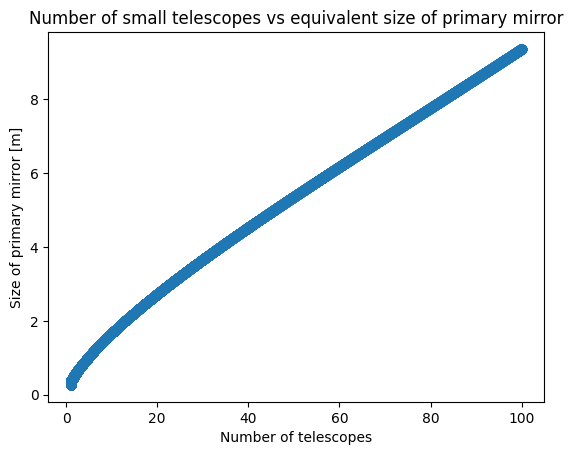

In [202]:
df['fraction_area'] = (df['diameter']/2)**2/(df['N']*(props_telescope1['r0'])**2)

df['big_cost'] = (df['diameter'])**2.46
df['small_cost'] = df['N']*0.15

plt.scatter(df['N'], df['diameter'])
plt.xlabel('Number of telescopes')
plt.ylabel('Size of primary mirror [m]')
plt.title('Number of small telescopes vs equivalent size of primary mirror')


Text(0.5, 1.0, 'Fractional area vs equivalent size of primary mirror')

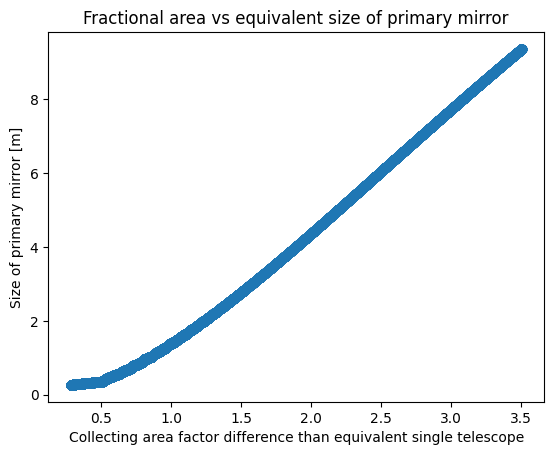

In [203]:
plt.scatter(df['fraction_area'], df['diameter'])
plt.xlabel('Collecting area factor difference than equivalent single telescope')
plt.ylabel('Size of primary mirror [m]')
plt.title('Fractional area vs equivalent size of primary mirror')


Text(0.5, 1.0, 'Cost of large telescope vs cost of small telescopes')

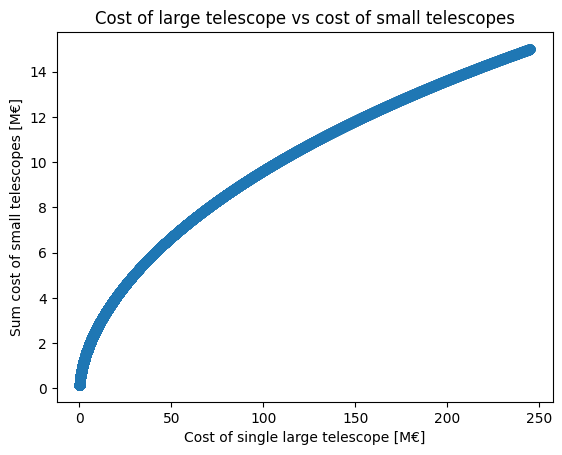

In [204]:
plt.scatter(df['big_cost'], df['small_cost'])
plt.xlabel('Cost of single large telescope [M€]')
plt.ylabel('Sum cost of small telescopes [M€]')
plt.title('Cost of large telescope vs cost of small telescopes')

# plt.xlim(0, 100)
# plt.ylim(0, 100)

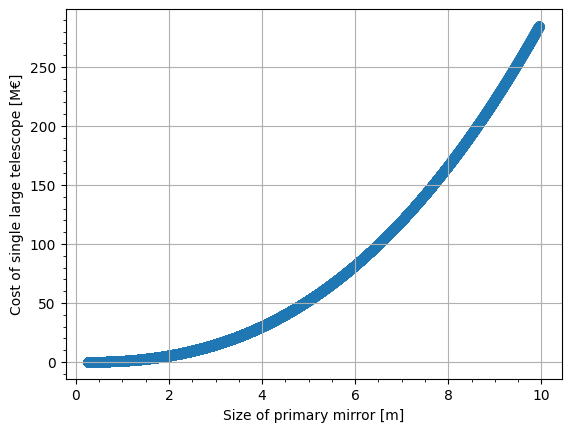

In [205]:
plt.scatter(df['diameter'], df['big_cost'])
plt.xlabel('Size of primary mirror [m]')
plt.ylabel('Cost of single large telescope [M€]')

# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.minorticks_on()

In [150]:
props_telescope1

{'name': 'pirtSPC_-60_zYJ',
 'plate_scale': 1,
 'N_dc': 200,
 'N_rn': 89.95,
 'well_depth': 55000,
 'bias_level': 0,
 'well_fill': 0.7,
 'read_time': 0.01,
 'r0': 0.25,
 'r1': 0,
 'ap_rad': 3}

In [ ]:
props_telescope2

In [ ]:
Ns

In [338]:
D = 8

Dsubs = np.arange(0.15, 1.01, 0.01)

tot_tel_costs = []
tot_cam_costs = []
tot_cost = []
Ns = []
for Dsub in Dsubs:

    N = (D/Dsub)**(4/3)
    Ns.append(N)

    tel_cost = Dsub**2.46
    tot_tel_costs.append(N*tel_cost)
    camera_cost = 0.1
    tot_cam_costs.append(N*camera_cost)

    total_cost = N*(tel_cost + camera_cost)
    tot_cost.append(total_cost)

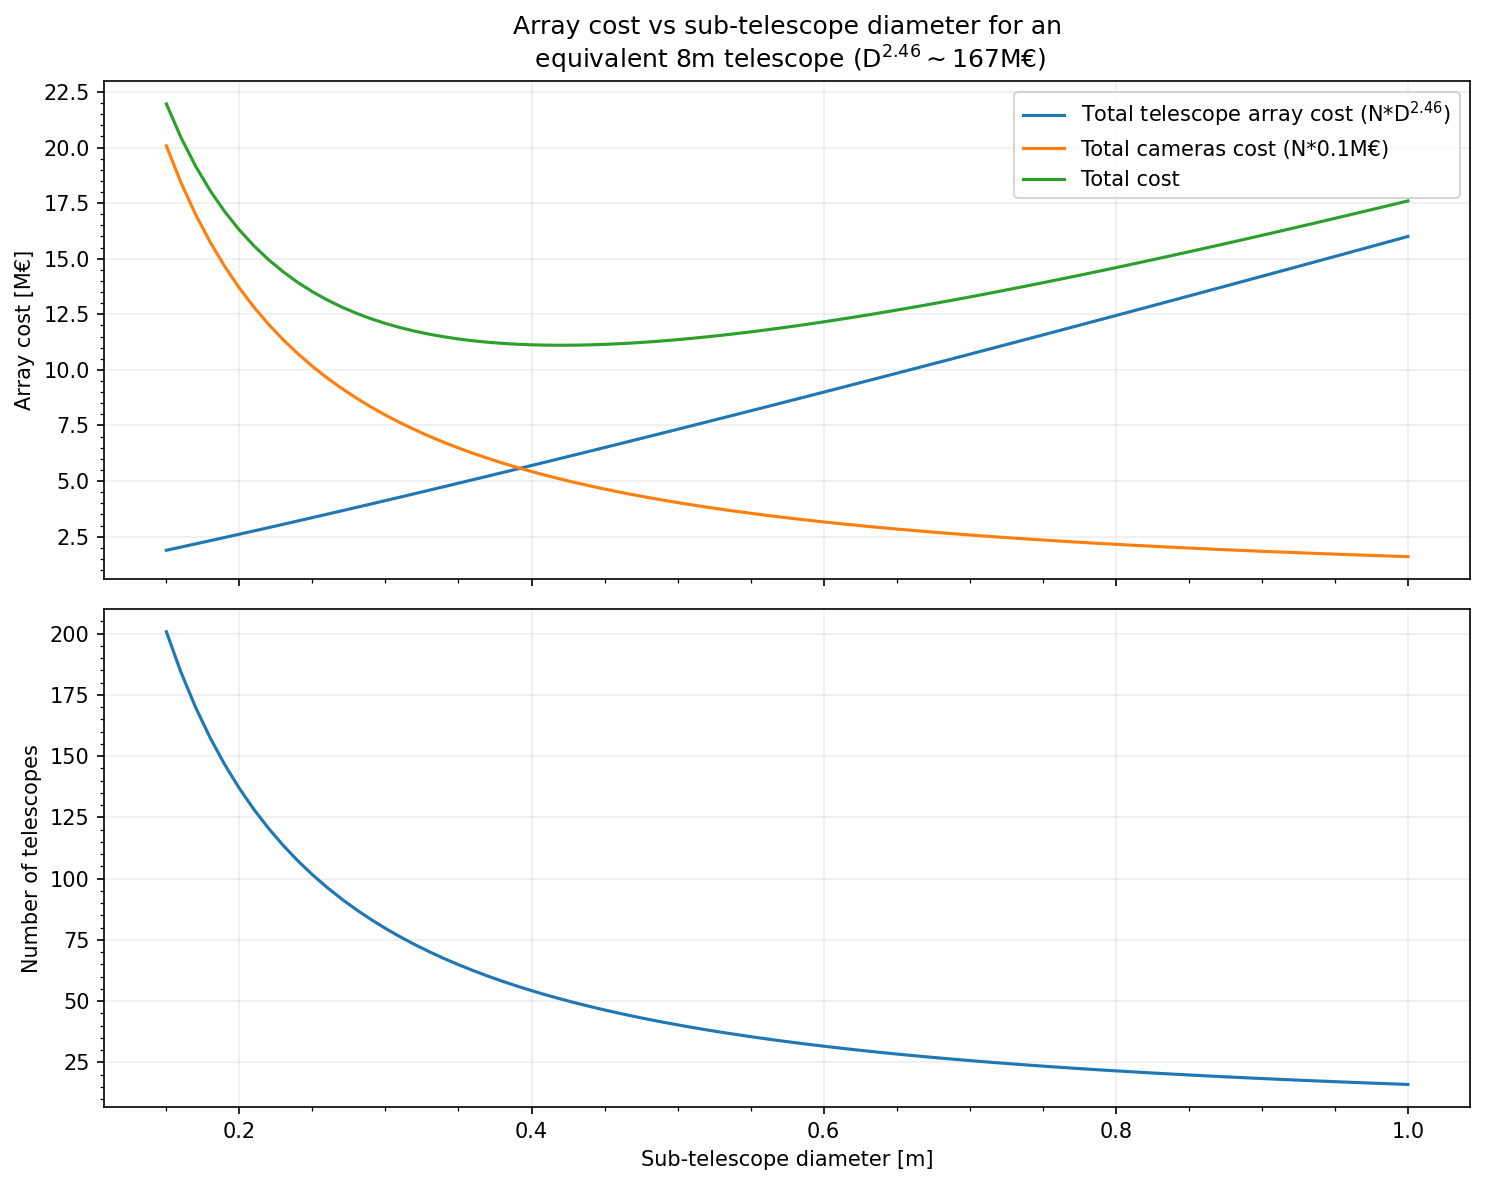

In [353]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True, dpi=150)

ax[0].plot(Dsubs, tot_tel_costs, label='Total telescope array cost (N*D$^{2.46}$)')
ax[0].plot(Dsubs, tot_cam_costs, label='Total cameras cost (N*0.1M€)')
ax[0].plot(Dsubs, tot_cost, label='Total cost')
ax[0].set_ylabel('Array cost [M€]')
ax[0].set_title(f'Array cost vs sub-telescope diameter for an\n equivalent {D}m telescope' + " (D$^{2.46} \sim $" + f"{D**2.46:.0f}M€)")
ax[0].legend()
# print(Ns)

ax[1].plot(Dsubs, Ns)
ax[1].set_ylabel('Number of telescopes')
ax[1].set_xlabel('Sub-telescope diameter [m]')

# minor ticks
ax[0].minorticks_on()
ax[1].minorticks_on()

# grid
ax[0].grid(True, alpha=0.2)
ax[1].grid(True, alpha=0.2)

fig.tight_layout()
#log
# plt.yscale('log')

Text(0, 0.5, 'Cost [M$]')

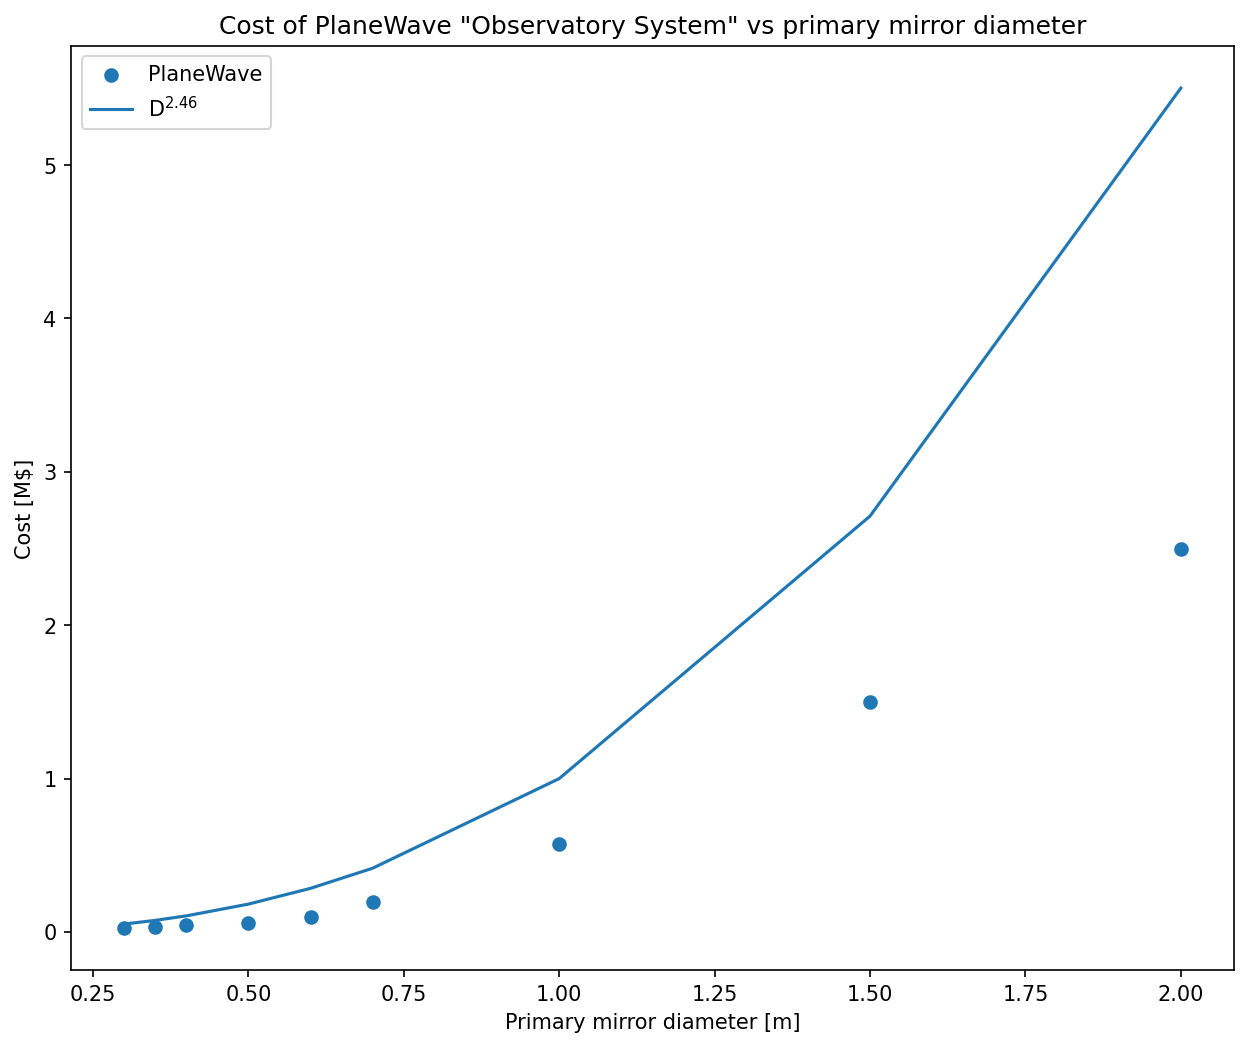

In [361]:
size = np.array([0.3, 0.35, 0.4, 0.5, 0.6, 0.7, 1, 1.5, 2])
price = np.array([25.5, 29.5, 44.5, 56, 97.5, 195, 575, 1500, 2500])

plt.figure(figsize=(10, 8), dpi=150)
plt.scatter(size, price/1000, label='PlaneWave')
plt.plot(size, np.array(size)**2.46, label='D$^{2.46}$')
# plt.xscale('log')
# plt.yscale('log')

plt.legend()

plt.title('Cost of PlaneWave "Observatory System" vs primary mirror diameter')
plt.xlabel('Primary mirror diameter [m]')
plt.ylabel('Cost [M$]')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, 'PlaneWave "Observatory System" Cost/D$^{2.46}$ [%]')

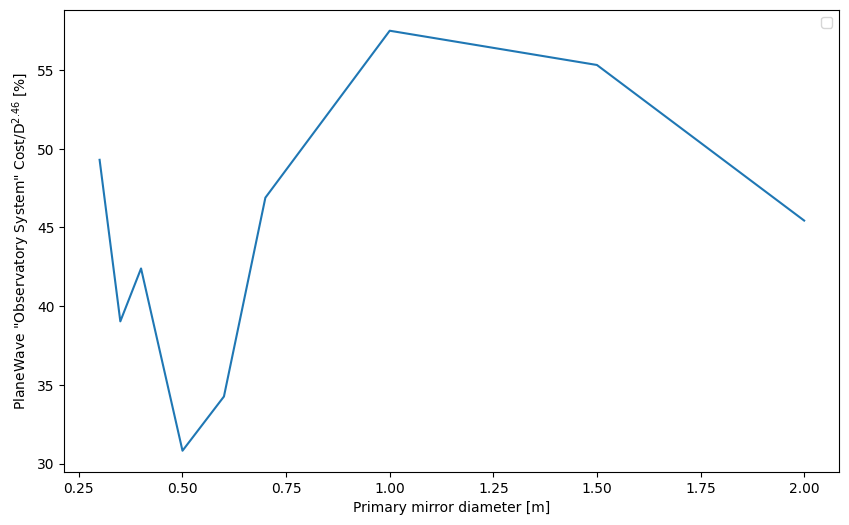

In [298]:


plt.figure(figsize=(10, 6))
# plt.scatter(size, price/1000, label='PlaneWave')
plt.plot(size, 100*(price/1000)/np.array(size)**2.46)
# plt.xscale('log')
# plt.yscale('log')

plt.legend()

plt.xlabel('Primary mirror diameter [m]')
plt.ylabel('PlaneWave "Observatory System" Cost/D$^{2.46}$ [%]')